### i will work on the number of transactions that  each debit card  made in each MCC but because the data is very sparce (contains many zeros ) i will convert it to binary and work on it 

In [1]:
# importing reqired libiraries
import pandas as pd 
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
np.random.seed(0)

In [2]:
# generating data like bank data (bank data is sparce) so i generate binary data with probability that there is 
# a 0.7 probability that it is  zero and 0.3 that it is one 
dataset=pd.DataFrame(np.random.choice(2, (600000,9), p=[0.7, 0.3]),columns=['shopping','services','vechiles',
        'entertainment','health_beauty','food_bevrages','ticketing_booking','electronics_applances','others'])
dataset.shape

(600000, 9)

In [3]:
# this is unique id for each card
dataset['card_id'] = dataset.index

In [5]:
dataset.head()

,shopping,services,vechiles,entertainment,health_beauty,food_bevrages,ticketing_booking,electronics_applances,others,card_id
0,0,1,0,0,0,0,0,1,1,0
1,0,1,0,0,1,0,0,0,1,1
2,1,1,1,1,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,0,3
4,0,0,1,0,0,0,0,0,0,4


### i will delete rows that all zeros (customers or cards that didnt made any transaction)

In [6]:
all_zeros=dataset[dataset[['shopping','services','vechiles',
         'entertainment','health_beauty','food_bevrages','ticketing_booking','electronics_applances','others']].sum(axis=1) == 0]
all_zeros.shape

(23945, 10)

In [7]:
dataset.drop(all_zeros.card_id,inplace=True)
print('remaining points')
print(600000-all_zeros.shape[0])
print(dataset.shape[0])

remaining points
576055
576055


### to reduce sparcity problem separate customers that made  transactions  only in one mccc

In [8]:
shopping=dataset.query('shopping==1 & services==0 & vechiles==0 & entertainment==0 & health_beauty==0	& food_bevrages==0	& ticketing_booking==0 & electronics_applances==0 & others==0')
shopping.shape

(10388, 10)

In [9]:
services=dataset.query('shopping==0 & services==1 & vechiles==0 & entertainment==0 & health_beauty==0	& food_bevrages==0	& ticketing_booking==0 & electronics_applances==0 & others==0')
services.shape

(10372, 10)

In [10]:
vechiles=dataset.query('shopping==0 & services==0 & vechiles==1 & entertainment==0 & health_beauty==0	& food_bevrages==0	& ticketing_booking==0 & electronics_applances==0 & others==0')
vechiles.shape

(10384, 10)

In [11]:
entertainment=dataset.query('shopping==0 & services==0 & vechiles==0 & entertainment==1 & health_beauty==0	& food_bevrages==0	& ticketing_booking==0 & electronics_applances==0 & others==0')
entertainment.shape

(10375, 10)

In [12]:
health_beauty=dataset.query('shopping==0 & services==0 & vechiles==0 & entertainment==0 & health_beauty==1 & food_bevrages==0	& ticketing_booking==0 & electronics_applances==0 & others==0')
health_beauty.shape

(10495, 10)

In [13]:
food_bevrages=dataset.query('shopping==0 & services==0 & vechiles==0 & entertainment==0 & health_beauty==0 & food_bevrages==1	& ticketing_booking==0 & electronics_applances==0 & others==0')
food_bevrages.shape

(10248, 10)

In [14]:
ticketing_booking=dataset.query('shopping==0 & services==0 & vechiles==0 & entertainment==0 & health_beauty==0 & food_bevrages==0	& ticketing_booking==1 & electronics_applances==0 & others==0')
ticketing_booking.shape

(10427, 10)

In [15]:
electronics_applances=dataset.query('shopping==0 & services==0 & vechiles==0 & entertainment==0 & health_beauty==0 & food_bevrages==0	& ticketing_booking==0 & electronics_applances==1 & others==0')
electronics_applances.shape

(10475, 10)

In [16]:
others=dataset.query('shopping==0 & services==0 & vechiles==0 & entertainment==0 & health_beauty==0 & food_bevrages==0	& ticketing_booking==0 & electronics_applances==0 & others==1')
others.shape

(10353, 10)

In [17]:
customers_made_transactions_in_one_MCC=shopping.shape[0]+services.shape[0]+vechiles.shape[0]+entertainment.shape[0]+health_beauty.shape[0]+food_bevrages.shape[0]+ticketing_booking.shape[0]+electronics_applances.shape[0]+others.shape[0]
customers_made_transactions_in_one_MCC

93517

### i will work on cards that made transactions in more than one mcc

In [18]:
dataset.shape[0]-customers_made_transactions_in_one_MCC

482538

In [19]:
dataset_new=dataset[dataset[['shopping','services','vechiles',
         'entertainment','health_beauty','food_bevrages','ticketing_booking','electronics_applances','others']].sum(axis=1) > 1]

In [20]:
card_id=dataset_new.card_id
data=dataset_new.drop(columns=['card_id'])
data.shape

(482538, 9)

In [21]:
# train gmm model
GMM=GaussianMixture(n_components=8,random_state=3).fit(data)
labels=GMM.predict(data)
frame=pd.DataFrame(dataset_new.copy())
frame['cluster_id']=labels

In [22]:
print((frame[frame['cluster_id']==0]).shape[0])
print((frame[frame['cluster_id']==1]).shape[0])
print((frame[frame['cluster_id']==2]).shape[0])
print((frame[frame['cluster_id']==3]).shape[0])
print((frame[frame['cluster_id']==4]).shape[0])
print((frame[frame['cluster_id']==5]).shape[0])
print((frame[frame['cluster_id']==6]).shape[0])
print((frame[frame['cluster_id']==7]).shape[0])

84611
77925
59622
65994
32690
13679
97057
50960


In [23]:
# saving result of clustering card_id and it`s cluster_id (label)
mapping=pd.DataFrame()
mapping['card_id']=card_id
mapping['cluster_id']=labels
mapping.to_excel('clustering_results.xlsx',index=False)

In [26]:
# saving result and features for profiling
temp=pd.DataFrame(data.copy())
temp['card_id']=card_id
temp['cluster_id']=labels
temp.to_excel('clustering_results_with_features_for_profiling.xlsx',index=False)

c:\users\bassam.abdelmohsen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


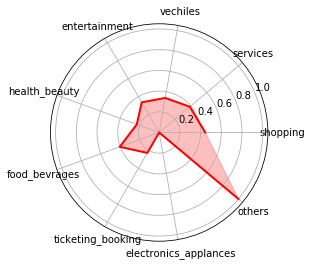

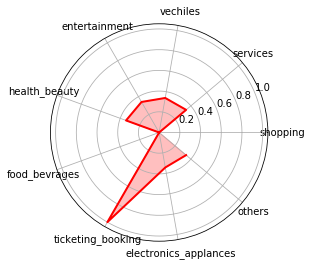

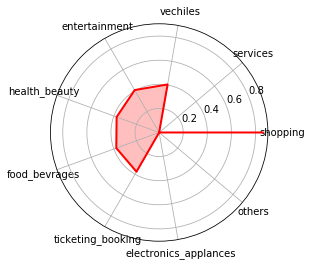

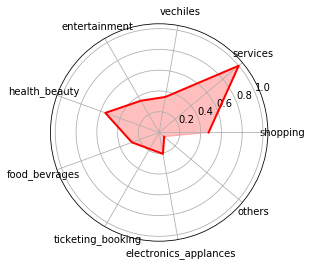

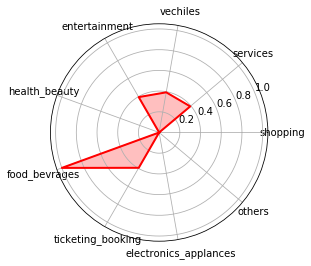

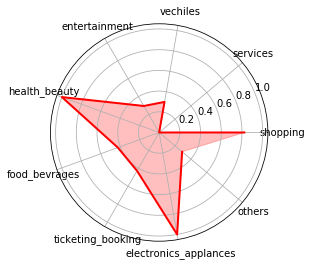

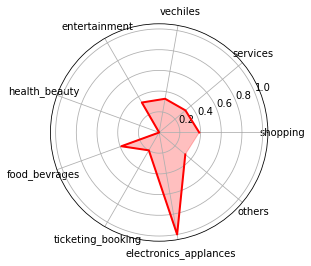

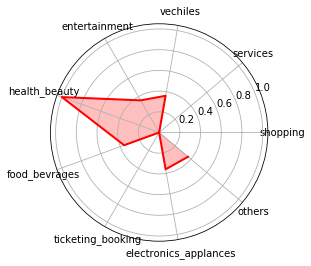

In [27]:
data['cluster_id']=labels
for i in range(0,8):
    labelss=np.array(['shopping','services','vechiles','entertainment',
                     'health_beauty','food_bevrages','ticketing_booking','electronics_applances','others'])
    stats=data[data['cluster_id']==i]
    stats.drop('cluster_id',axis='columns',inplace=True)
    stats=stats.mean(axis=0)
    stats=stats.transpose()
    angles=np.linspace(0,2*np.pi,len(labelss),endpoint=False)

    fig=plt.figure()
    ax=fig.add_subplot(111,polar=True)
    ax.plot(angles,stats,c='red',linewidth=2)
    ax.fill(angles,stats,c='red',alpha=0.25)
    ax.set_thetagrids(angles*180/np.pi,labelss)
    ax.grid(True)
data.drop('cluster_id',axis='columns',inplace=True)

In [28]:
#saving the model in pikle file
pickle.dump(GMM, open('model', 'wb'))